# General statistics about poems

In [4]:
import os
import glob
import re
import csv
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, normalize

# Mount the Google drive for access to files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 12})

In [6]:
poems_char_clean = False
poems_word_clean = False

In [7]:
incerto_dir = '/content/drive/MyDrive/incerto-autore/'
new_poems_dir = os.path.join(incerto_dir, 'data', 'poems')
figures_dir = os.path.join(incerto_dir, 'figures')
output_dir = os.path.join(incerto_dir, 'output')

In [8]:
poems_whole_df = pd.read_csv(os.path.join(new_poems_dir, 'poems_whole.csv'))
poems_whole_df[:1]

,label,filename,author,poem
0,VF10,10 Franco.txt,Franco,In disparte da te sommene andata per frastorna...


In [9]:
poems_split_df = pd.read_csv(os.path.join(new_poems_dir, 'poems_split.csv'))
poems_split_df[:1]

,label,filename,author,poem
0,VF10_1,10 Franco.txt,Franco,In disparte da te sommene andata per frastorna...


## General figures

In [10]:
def make_count_df(_df):

  rows = []
  for author in _df.author.unique():
    df = _df[_df['author'] == author].copy()
    n_poems = len(df)
    poems = df.poem.tolist()
    vec = CountVectorizer(input='content',
                  encoding='utf-8',
                  lowercase=True,
                  analyzer='word',  # char_wb to add padding at beggining and end of the string
                  ngram_range=(1,1))
    X = vec.fit_transform(poems)
    counts = pd.DataFrame(X.toarray(),
                    index=df.label,
                    columns=vec.get_feature_names_out())
    avg_poem_len = counts.sum(axis=1).mean()
    tot_n_words = counts.sum(axis=1).sum()
    rows.append([author, n_poems, avg_poem_len, tot_n_words])

  return rows

In [11]:
def make_barplot(df, _y, _label, _typ, _genfig_dir):

  _fig = plt.figure(figsize=(7, 3))
  ax = sns.barplot(data=df, x='author', y=_y, hue='author',
                  edgecolor='white',
                  errorbar=None)

  ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
  # ax.spines['top'].set_visible(False) # Remove top, left, right border
  # ax.spines['right'].set_visible(False)


  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_ylabel(_label)
  ax.set_xlabel('Authors')

  ints = []
  for container in ax.containers:
    for v in container:
      labels = [str(round(v.get_height())) for v in container]
      ax.bar_label(container, labels=labels, padding=3, fontsize=10)
      ints.append(round(v.get_height()))

  ax.set_ylim(0, (np.max(ints))+((np.max(ints))/10))
  plt.title(f'{_label} per author', size=12)
  # plt.savefig(os.path.join(_genfig_dir, f'{_y}_{_typ}.png'), dpi = 300, bbox_inches = "tight")

#### Whole

In [12]:
whole_rows = make_count_df(poems_whole_df)
whole_counts_df = pd.DataFrame(whole_rows, columns = ['author', 'n_poems', 'avg_poem_len', 'tot_n_words'])
whole_counts_df[:1]

,author,n_poems,avg_poem_len,tot_n_words
0,Franco,20,954.4,19088


In [13]:
genfig_dir = os.path.join(figures_dir, 'general')
if not os.path.exists(genfig_dir):
  os.makedirs(genfig_dir)

<ipython-input-11-4adf541abf51>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


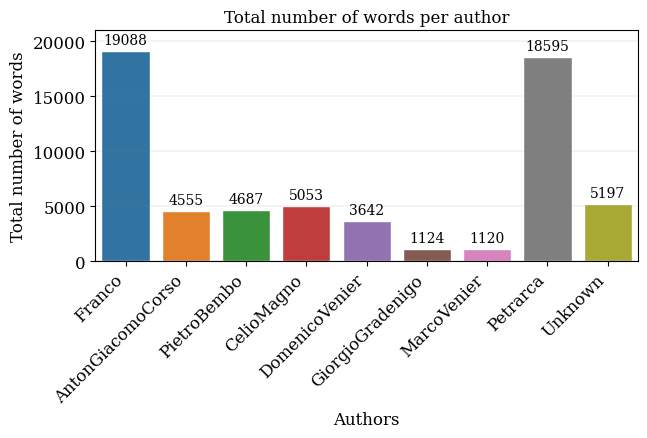

In [14]:
make_barplot(whole_counts_df, 'tot_n_words', 'Total number of words', 'whole', genfig_dir)

<ipython-input-11-4adf541abf51>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


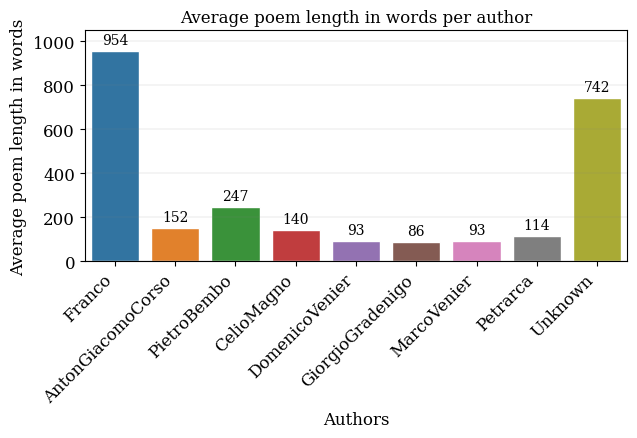

In [15]:
make_barplot(whole_counts_df, 'avg_poem_len', 'Average poem length in words', 'whole', genfig_dir)

<ipython-input-11-4adf541abf51>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


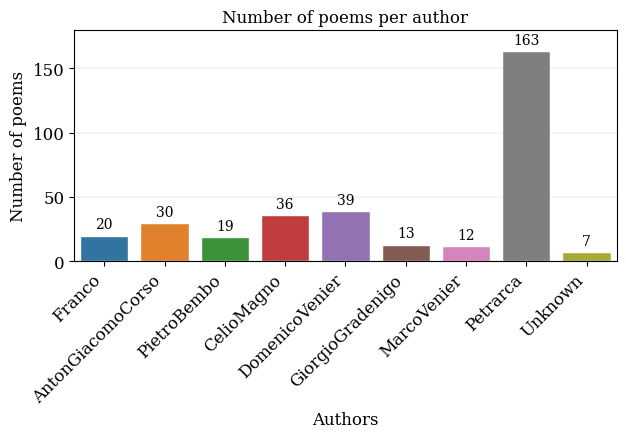

In [16]:
make_barplot(whole_counts_df, 'n_poems', 'Number of poems', 'whole', genfig_dir)

#### Split

In [18]:
split_rows = make_count_df(poems_split_df)
split_counts_df = pd.DataFrame(split_rows, columns = ['author', 'n_poems', 'avg_poem_len', 'tot_n_words'])
split_counts_df[:1]

,author,n_poems,avg_poem_len,tot_n_words
0,Franco,224,85.214286,19088


In [19]:
genfig_dir = os.path.join(figures_dir, 'general')
if not os.path.exists(genfig_dir):
  os.makedirs(genfig_dir)

<ipython-input-11-4adf541abf51>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


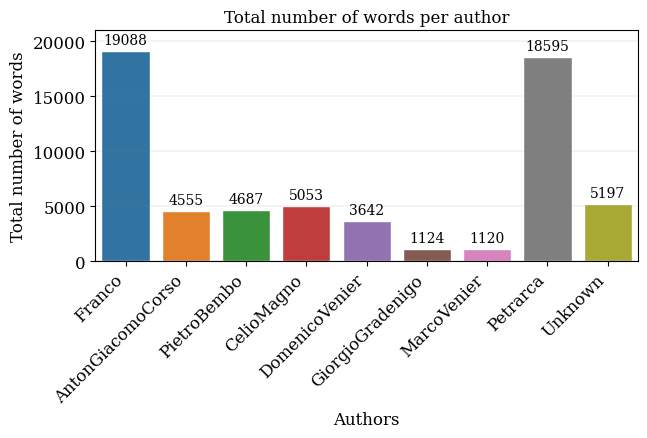

In [20]:
make_barplot(split_counts_df, 'tot_n_words', 'Total number of words', 'split', genfig_dir)

<ipython-input-11-4adf541abf51>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


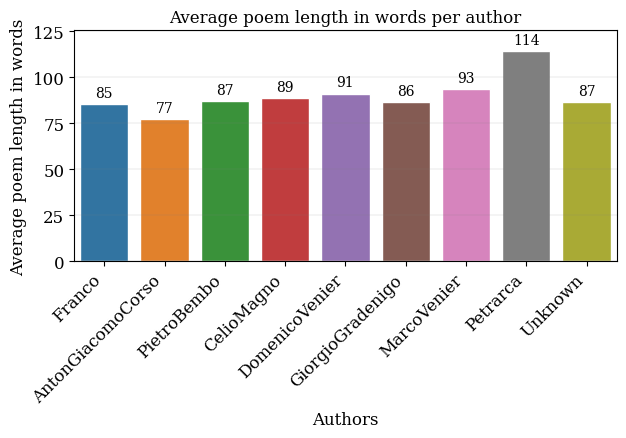

In [21]:
make_barplot(split_counts_df, 'avg_poem_len', 'Average poem length in words', 'split', genfig_dir)

<ipython-input-11-4adf541abf51>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


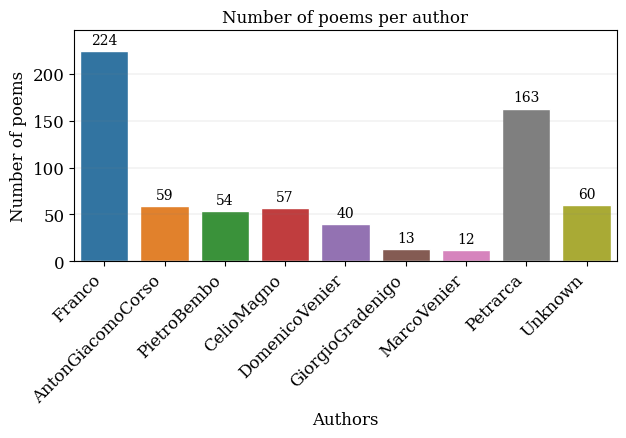

In [22]:
make_barplot(split_counts_df, 'n_poems', 'Number of poems', 'split', genfig_dir)